<a href="https://colab.research.google.com/github/neelkanthrawat/Course_Computational_statistics_and_data_analysis/blob/main/Exercise_8_Heteroskedastic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
import torch
import torch.nn as nn
import sklearn
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/data_09_x_y.csv')

In [ ]:
df

,x,y
0,-20.00000,-1.064822
1,-19.91992,-1.579783
2,-19.83984,-1.215242
3,-19.75976,-1.133058
4,-19.67968,-0.917498
...,...,...
995,59.67968,4.639976
996,59.75976,3.174017
997,59.83984,6.610470
998,59.91992,6.352328


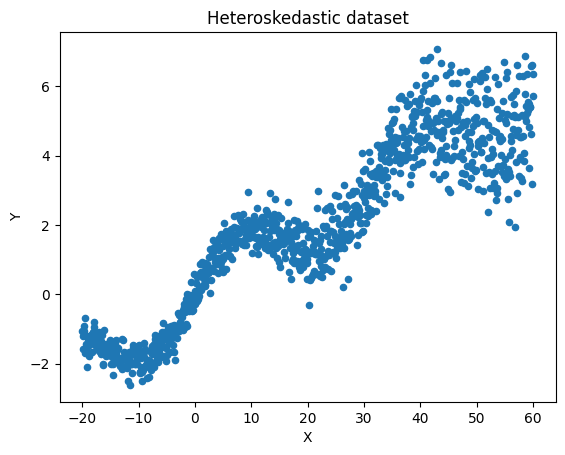

In [ ]:
df.plot(x='x',y='y', kind='scatter')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Heteroskedastic dataset')
plt.show()

In [ ]:
xval, yval=df['x'].values, df['y'].values
xval.shape, yval.shape, type(yval)

((1000,), (1000,), numpy.ndarray)

In [ ]:
xval, yval =np.array(xval).reshape(-1,1), np.array(yval).reshape(-1,1)
xval.shape, yval.shape

((1000, 1), (1000, 1))

In [ ]:
random_state=42
x_train, x_test, y_train, y_test = train_test_split(xval, yval, test_size=0.33, random_state=random_state)

In [ ]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((670, 1), (330, 1), (670, 1), (330, 1))

# 3.(b)

1. Creating a *MLP*

In [ ]:
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(1, 32)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(32, 64)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(64, 1)

    def forward(self, x):
        x = self.fc1(x)
        x = self.relu1(x)
        x = self.fc2(x)
        x = self.relu2(x)
        x = self.fc3(x)
        return x


In [ ]:
# Create an instance of the MLP model
mlp_model = MLP()

# Print the architecture of the model
print(mlp_model)

MLP(
  (fc1): Linear(in_features=1, out_features=32, bias=True)
  (relu1): ReLU()
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (relu2): ReLU()
  (fc3): Linear(in_features=64, out_features=1, bias=True)
)


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

import torch
import torch.nn as nn
import torch.optim as optim

def train_and_validate(model, train_loader, val_loader,
                       num_epochs=10, lr=0.001,
                       print_after=2):

    model.to(device)

    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=lr)

    for epoch in range(num_epochs):
        # Training
        model.train()
        running_loss = 0.0
        for x, y in train_loader:
            x, y = x.to(device), y.to(device)

            optimizer.zero_grad()

            outputs = model(x)
            loss = criterion(outputs, y)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()

        avg_loss = running_loss / len(train_loader)

        # Validation
        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for x, y in val_loader:
                x, y = x.to(device), y.to(device)

                outputs = model(x)
                loss = criterion(outputs, y)
                val_loss += loss.item()

        avg_val_loss = val_loss / len(val_loader)

        if (epoch + 1) % print_after == 0:
            print(f"Epoch {epoch + 1}/{num_epochs} => Training Loss: {avg_loss:.4f}, Validation Loss: {avg_val_loss:.4f}")

    print("Training finished.")




In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")